# Action 1 购物篮词云分析

#### 导入需要的第三方库

In [1]:
from wordcloud import WordCloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [4]:
import numpy as np

In [5]:
from lxml import etree

In [6]:
from nltk.tokenize import word_tokenize

##### 读取数据，因为文件中没有表头，所以需要设置header为none

In [7]:
data = pd.read_csv('./Market_Basket_Optimisation.csv', header = None)

##### 把数据存放到transaction当中

In [8]:
transactions = []

##### 储存key:value到字典，这是为了之后的top 10展示，需要用字典来储存所有出现的物品和对应的次数，之后就可以根据出现的次数来把最高的10项展示出来

In [9]:
item_count = {}

##### 可以看一下数据的size

In [10]:
print("行数：",data.shape[0])

行数： 7501


In [11]:
print("列数：",data.shape[1])

列数： 20


##### 和之前读取数据一样，分别遍历行数和列数将每一个transaction加入到transations这个列表当中。需要注意因为有nan值，而且类型是float，所以需要先将每一个值转化成str的格式，然后再做比较是否等于nan。否则即使是nan会因为类型不等而符合if条件

In [12]:
for i in range(0,data.shape[0]):
    temp = []
    for j in range(0,data.shape[1]):
        item = str(data.values[i,j])
        if item != 'nan':
            temp.append(item)
            #以下是对出现的物品进行计数，如果之前没有出现则添加这个物品并且将数值设为1.如果之前物品出现过，则加1
            if item not in item_count:
                item_count[item] = 1
            else:
                item_count[item] += 1
    transactions.append(temp)

        

##### 将数据成功存入到transactions列表中之后，生成词云

In [13]:
all_word = ' '.join('%s' %item for item in transactions)

##### 定义去掉停用词的函数，从课件代码中拿过来的封装函数。可以把目标词去掉。在这个作业当中其实不需要因为没有要去掉的词，不过还是加上因为在其他的一些场景下可能需要去掉一些高频率出现但是没有意义的词

In [14]:
# 去掉停用词
def remove_stop_words(f):
	stop_words = ['Movie']
	for stop_word in stop_words:
		f = f.replace(stop_word, '')
	return f

##### 定义生成词云的函数，也是从课件代码中直接拿过来的封装函数，传入一个包含所有词的str，然后会将这个str里的所有词拆分来生成词云

In [15]:
def create_word_cloud(f):
	print('根据词频，开始生成词云!')
	f = remove_stop_words(f)
	cut_text = word_tokenize(f)
	#print(cut_text)
	cut_text = " ".join(cut_text)
	wc = WordCloud(
		max_words=100,
		width=2000,
		height=1200,
    )
	wordcloud = wc.generate(cut_text)
	# 写词云图片
	wordcloud.to_file("wordcloud.jpg")
	# 显示词云文件
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.show()

##### 调用之前的函数来生成词云

根据词频，开始生成词云!


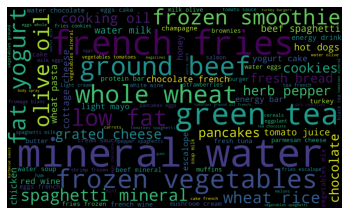

In [16]:
create_word_cloud(all_word)

##### 将商品以逆序存入list当中因为是逆序，所以要使用reverse为True

In [19]:
top_list = (sorted(item_count.items(),key = lambda x:x[1],reverse=True))

##### 将前10位打印出来

In [21]:
print(top_list[:10])

[('mineral water', 1788), ('eggs', 1348), ('spaghetti', 1306), ('french fries', 1282), ('chocolate', 1230), ('green tea', 991), ('milk', 972), ('ground beef', 737), ('frozen vegetables', 715), ('pancakes', 713)]
